# Constrained Optimization

**Exercise:**
Let $\boldsymbol w =: \left(w_1, w_2 \right)^T \in \mathbb R^2$. Solve the optimization problem
$$ \mathrm{argmin}_{\boldsymbol w} ||\boldsymbol w || ^2$$
subject to the constraints
$$ w_1 \leq 0 \quad \land \quad w_1 + w_2 \geq 1.$$

**Visualization**:

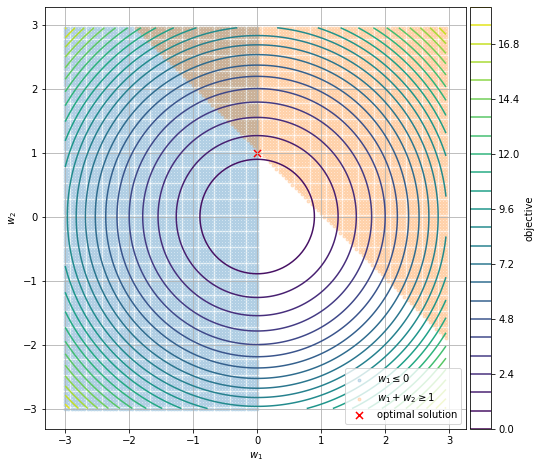

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## define the objective and the constraints
w1 = np.arange(-3.0, 3.0, 0.05)
w2 = np.arange(-3.0, 3.0, 0.05)
ww1, ww2 = np.meshgrid(w1, w2)
objective = ww1 ** 2 + ww2 ** 2
constraint1 = ww1 <= 0
constraint2 = ww1 + ww2 >= 1

## plot objective and constraints
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(8,8))
ax = axes[0, 0]
h = ax.contour(ww1, ww2, objective, levels = 25)
ax.scatter(ww1[constraint1], ww2[constraint1], alpha=0.2, label="$w_1 \leq 0$", marker=".")
ax.scatter(ww1[constraint2], ww2[constraint2], alpha=0.2, label="$w_1+w_2 \geq 1$", marker=".")
ax.scatter(0.0, 1.0, label="optimal solution", marker="x", s=50, color="r")
ax.legend()
ax.axis("scaled")
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.grid()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax, label="objective")
plt.show()

**Solution**:

1.) Lagrangian: 
$$\mathcal L\left(\boldsymbol w, \boldsymbol \lambda\right) = \boldsymbol w^T \boldsymbol w + \lambda_1 w_1 - \lambda_2 \left( w_1 + w_2 - 1 \right), $$ where $\boldsymbol \lambda =: \left(\lambda_1, \lambda_2 \right)$.

2.) Optimal solution $\boldsymbol w^* \left(\boldsymbol \lambda \right)$ for primal parameters: 
$$ \frac{\partial \mathcal L}{\partial \boldsymbol w} = \begin{pmatrix} 2 w_1 + \lambda_1 - \lambda_2 \\ 2 w_2 -\lambda_2 \end{pmatrix} \overset{!}{=} \boldsymbol 0 \quad \Rightarrow \quad \boldsymbol w^* \left(\lambda \right) =  \begin{pmatrix} \frac{\lambda_2-\lambda_1}{2} \\ \frac{\lambda_2}{2} \end{pmatrix}.$$

3.) Dual function:
$$g(\boldsymbol \lambda) = \frac{\lambda_1^2}{4} + \frac{\lambda_2^2}{4} - \frac{\lambda_1 \lambda_2}{2} + \frac{\lambda_2^2}{4} - \frac{\lambda_1^2}{2} + \frac{\lambda_1\lambda_2}{2} + \frac{\lambda_1 \lambda_2}{2} - \frac{\lambda_2^2}{2} - \frac{\lambda_2^2}{2} + \lambda_2 = -\frac{\lambda_1^2}{4} -\frac{\lambda_2^2}{2} +\frac{\lambda_1\lambda_2}{2} + \lambda_2.$$

4.) Optimal solution $\boldsymbol \lambda^*$ for dual parameters:
$$ \frac{\partial g}{\partial \boldsymbol \lambda} = \begin{pmatrix} -\frac{\lambda_1}{2} + \frac{\lambda_2}{2} \\  -\lambda_2 + \frac{\lambda_1}{2} + 1 \end{pmatrix} \overset{!}{=} \boldsymbol 0 $$
From the first equation we get:
$$\lambda_1^* = \lambda_2^*.$$
Plugging this into second equation yields:
$$ -\lambda_1 + \frac{\lambda_1}{2} + 1 \overset{!}{=} 0 \quad \Rightarrow \quad \lambda_1^* = 2.$$
Thus, we have:
$$\boldsymbol \lambda^* = \begin{pmatrix}2 \\ 2 \end{pmatrix} \quad \left(\geq \boldsymbol 0 \right).$$

5.) Optimal solution for primal parameters, evaluated at $\boldsymbol \lambda^*$:
$$\boldsymbol w^* \left(\boldsymbol \lambda^* \right) = \begin{pmatrix}0 \\ 1\end{pmatrix}.$$
This is also what we found above through visual inspection.